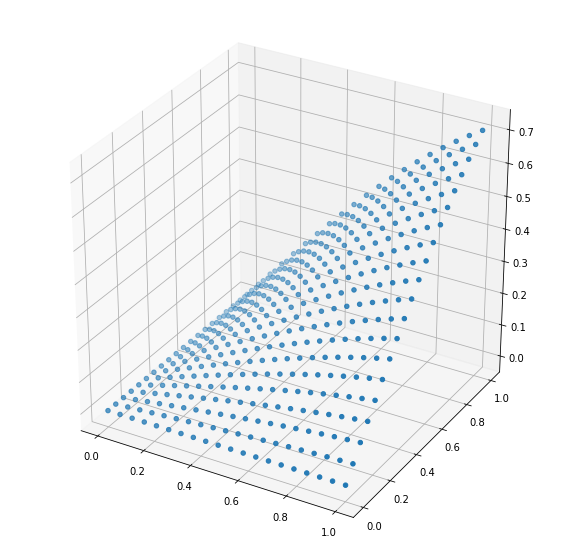

In [1]:
from model import GNN, train, phys_loss, get_dataloader
import numpy as np
import matplotlib.pyplot as plt
import torch

def u(x, y):
    return np.sin(x)*np.sin(y)

xs = np.linspace(0, 1, num=20) 
ys = np.linspace(0, 1, num=20)
points = np.zeros((xs.shape[0] * xs.shape[0], 2))
i = 0
for x in xs:
    for y in ys:
        points[i, 0] = x
        points[i, 1] = y
        i += 1
u = u(points[:, 0], points[:, 1]).reshape(-1, 1)
data = np.hstack((points, u))

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(points[:, 0], points[:, 1], u)
plt.show()

In [2]:
m = GNN(data)
loss_fn = phys_loss(m)
loss_fn.cuda()
m.cuda()
optimizer = torch.optim.Adam(m.parameters(), lr=0.001)
x = np.linspace(0, 1, num=20)
y = np.linspace(0, 1, num=20)
tdl = get_dataloader(x, y)
#lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 10, eta_min=0, last_epoch=- 1, verbose=False)
#lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.9, last_epoch=- 1, verbose=False)
losses = train(1000, m, loss_fn, optimizer, tdl)

-----------------------------------------
Adjacency matrix generated succesfully!!!
-----------------------------------------
Epoch: 0 | Loss: 0.33934584416841207
Epoch: 1 | Loss: 0.29241369015194085
Epoch: 2 | Loss: 0.29096704897911924
Epoch: 3 | Loss: 0.2901205381280498
Epoch: 4 | Loss: 0.2891001102122429
Epoch: 5 | Loss: 0.2875844092402411
Epoch: 6 | Loss: 0.2849784019819804
Epoch: 7 | Loss: 0.2799594302563683
Epoch: 8 | Loss: 0.2707816140579158
Epoch: 9 | Loss: 0.2582524085025254
Epoch: 10 | Loss: 0.24113669731703244
Epoch: 11 | Loss: 0.21966355264578996
Epoch: 12 | Loss: 0.1955181717088348
Epoch: 13 | Loss: 0.17057765363470503
Epoch: 14 | Loss: 0.14606419264485962
Epoch: 15 | Loss: 0.12318502087146044
Epoch: 16 | Loss: 0.1033162435663766
Epoch: 17 | Loss: 0.08786932577526099
Epoch: 18 | Loss: 0.07986697086476181
Epoch: 19 | Loss: 0.08128643682912777
Epoch: 20 | Loss: 0.09270384907722473
Epoch: 21 | Loss: 0.11405986919999123
Epoch: 22 | Loss: 0.14435906610206553
Epoch: 23 | Loss: 0

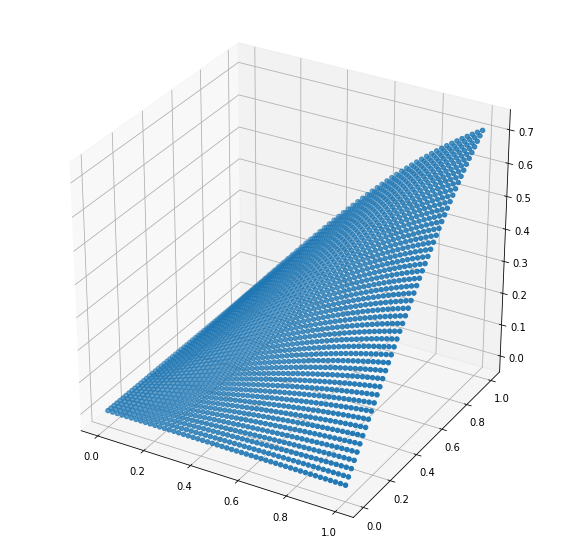

In [3]:
def u(x, y):
    return np.sin(x)*np.sin(y)

xs = np.linspace(0, 1, num=50) 
ys = np.linspace(0, 1, num=50)
points = np.zeros((xs.shape[0] * xs.shape[0], 2))
i = 0
for x in xs:
    for y in ys:
        points[i, 0] = x
        points[i, 1] = y
        i += 1
u = u(points[:, 0], points[:, 1]).reshape(-1, 1)
data = np.hstack((points, u))

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(points[:, 0], points[:, 1], u)
plt.show()

In [5]:
with torch.no_grad():
    u_nn = []
    for x, y in zip(points[:, 0], points[:, 1]):
        u_nn.append(m(torch.Tensor([x]).cuda(), torch.Tensor([y]).cuda()).cpu().numpy())
    u_nn = np.array(u_nn)
    print(u_nn)

[[0.01412049]
 [0.01422822]
 [0.01422273]
 ...
 [0.7014775 ]
 [0.69593   ]
 [0.6893235 ]]


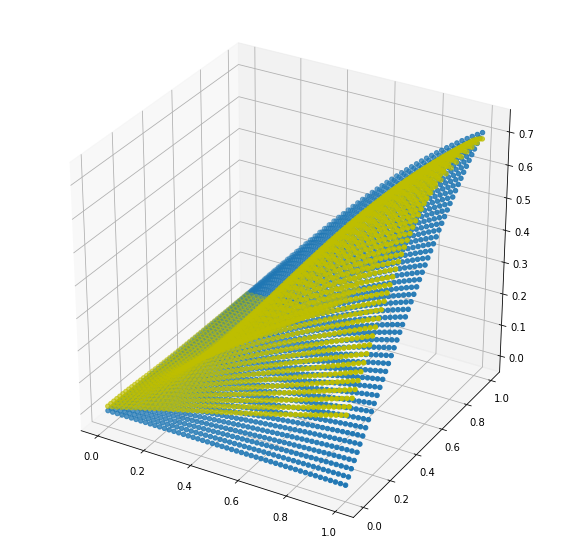

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(points[:, 0], points[:, 1], u)
ax.scatter3D(points[:, 0], points[:, 1], u_nn, c='y')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
print(f"Корень из mse: {np.sqrt(mse(u, u_nn))}")
print(f"mae: {mae(u, u_nn)}")

Корень из mse: 0.13220056169517005
mae: 0.11204384372228642
